In [2]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [21]:
class LabelSmoothing(nn.Module):
    "Implement label smoothing."
    def __init__(self, size, smoothing=0.0):
        super(LabelSmoothing, self).__init__()
        self.criterion = nn.KLDivLoss(reduction='sum')
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.size = size
        self.true_dist = None
        
    def forward(self, x, target):
        assert x.size(1) == self.size
        true_dist = x.data.clone()
        true_dist.fill_(self.smoothing / (self.size - 1))
        true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        self.true_dist = true_dist
        return self.criterion(x, true_dist)

tensor([[0.0250, 0.0250, 0.9000, 0.0250, 0.0250],
        [0.0250, 0.9000, 0.0250, 0.0250, 0.0250],
        [0.9000, 0.0250, 0.0250, 0.0250, 0.0250]])


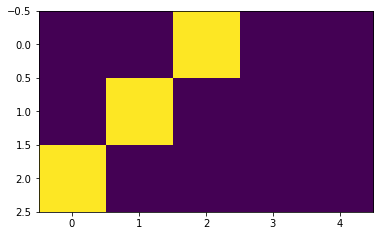

In [24]:
# Example of label smoothing.
crit = LabelSmoothing(5, 0.1)
predict = torch.FloatTensor([[0, 0.2, 0.7, 0.1, 0],
                             [0, 0.2, 0.7, 0.1, 0], 
                             [0, 0.2, 0.7, 0.1, 0]])
v = crit(predict.log(), 
         torch.LongTensor([2, 1, 0]))

# Show the target distributions expected by the system.
print(crit.true_dist)
plt.imshow(crit.true_dist)